In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import glob
from collections import Counter, defaultdict
import ast
from sklearn.preprocessing import StandardScaler, normalize
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from pandarallel import pandarallel
pandarallel.initialize()


INFO: Pandarallel will run on 128 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
data = pd.read_csv("../lite_data/climate_pca.csv", header=0)
data.head()

,author,subreddit,subcontrib,contribrank
0,-Ai,Meditation,59,2508
1,-Ai,pcmasterrace,487,2508
2,-Ai,findareddit,41,2508
3,-Ai,MechanicalKeyboards,49,2508
4,-Ai,me_irl,42,2508


In [3]:
data = data.loc[data['contribrank']<500]

In [4]:
antivax = ["vaccineskeptics","VaccinesCause","HealthConspiracy", "VaxTalk", "VaccineIngredients"]
climateskeptic = ["climateskeptics","greenskeptics","climatechangebullshit","climatehoax","Globalwarmingisfake","climateconspiratard"]
chemprints = ["CHEMPRINTS","Chemtrail","chemtrails","chemtrailpilots"]
flatearth = ["notaglobe","theworldisflat","flatearth", "Flat_Earth", "Flatearther"]
#proclimate = ["ClimateCrisis", "CarbonCapture", "Climate_Discussion", "Climate", "ClimateActionPlan", "ClimateOffensive", "climatechange"]
proclimate = ["ClimateCrisis", "CarbonCapture", "Climate_Discussion", "Climate", "ClimateActionPlan", "ClimateOffensive"]

conspiracy = ["conspiracy", "The_Donald"]
politics = ["Libertarian", "Conservative"]

In [5]:
def subredditgroup(subreddit):
    if subreddit in proclimate:
        return "proclimate"
    if subreddit in climateskeptic:
        return "climateskeptic"
#     if subreddit in conspiracy:
#         return "conspiracysub"
    if subreddit in politics:
        return "politicssub"
    
    return subreddit

In [6]:
data['g_sub'] = data["subreddit"]#.parallel_apply(lambda x: subredditgroup(x))

In [7]:
#data = data.loc[data['g_sub'].isin(relevant_subs)]

In [8]:
data = data.groupby(['author','g_sub']).sum().reset_index()

In [9]:
data.head()

,author,g_sub,subcontrib,contribrank
0,--_-_o_-_--,AndroidGaming,38,471
1,--_-_o_-_--,AskReddit,102,471
2,--_-_o_-_--,AustralianPolitics,92,471
3,--_-_o_-_--,Bitcoin,210,471
4,--_-_o_-_--,BitcoinAUS,14,471


In [10]:
data['subcontrib_bin'] = 1

In [11]:
defsubs = pd.read_csv("../lite_data/defaults.csv", header=0)
defsubs.head()

,subreddit
0,AskReddit
1,announcements
2,funny
3,pics
4,todayilearned


In [12]:
defaults = defsubs['subreddit'].tolist()
print(defaults)

['AskReddit', 'announcements', 'funny', 'pics', 'todayilearned', 'science', 'IAmA', 'blog', 'videos', 'worldnews', 'gaming', 'movies', 'Music', 'aww', 'news', 'gifs', 'askscience', 'explainlikeimfive', 'EarthPorn', 'books', 'television', 'LifeProTips', 'sports', 'DIY', 'Showerthoughts', 'space', 'Jokes', 'tifu', 'food', 'photoshopbattles', 'Art', 'InternetIsBeautiful', 'mildlyinteresting', 'GetMotivated', 'history', 'nottheonion', 'gadgets', 'dataisbeautiful', 'Futurology', 'Documentaries', 'listentothis', 'personalfinance', 'philosophy', 'nosleep', 'creepy', 'OldSchoolCool', 'UpliftingNews', 'WritingPrompts', 'TwoXChromosomes', 'europe', 'ireland', 'italy', 'mexico', 'france', 'NewZealand', 'brasil', 'argentina', 'futbol', 'polska', 'de', 'de_IAMA', 'Bundesliga', 'sweden', 'svenskpolitik', 'spop', 'baconreader', 'AlienBlue', 'redditisfun', 'Fitness', 'technology', 'WTF', 'bestof', 'AdviceAnimals', 'politics', 'atheism', 'reddit.com', 'programming', 'entertainment', 'worldcup', 'olympi

In [13]:
keepsubs = ['science', 'askscience', 'space', 'politics']
remove_subs = list(set(defaults).difference(keepsubs))
print(len(defaults), len(keepsubs), len(remove_subs))

81 4 77


In [14]:
data = data.loc[~data['g_sub'].isin(remove_subs)]

In [15]:
b1 = pd.pivot_table(data, values='subcontrib', index='g_sub', columns='author').reset_index()
b1.head()

author,g_sub,--_-_o_-_--,-Natsoc-,-misanthroptimist,1DieselDave,20l9,2PetitsVerres,3DogNapt,4to6,4too,...,xray606,yayforjay,yeehawyeetus,yetanothercfcgrunt,yetifile,yodaiz,zArtLaffer,zcleghern,zoloft_rocket,zuckernburg
0,0x10c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000ccplus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100movies365days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100yearsago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10mm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
authornames = list(b1)[1:]
authornames[:5]

['--_-_o_-_--', '-Natsoc-', '-misanthroptimist', '1DieselDave', '20l9']

In [17]:
for a in authornames:
    b1[a] = b1[a].fillna(0)

In [18]:
b1.head()

author,g_sub,--_-_o_-_--,-Natsoc-,-misanthroptimist,1DieselDave,20l9,2PetitsVerres,3DogNapt,4to6,4too,...,xray606,yayforjay,yeehawyeetus,yetanothercfcgrunt,yetifile,yodaiz,zArtLaffer,zcleghern,zoloft_rocket,zuckernburg
0,0x10c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000ccplus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100movies365days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100yearsago,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10mm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
sublist = b1['g_sub'].tolist()
mat = np.array(b1[authornames].values)
mat.shape

(9527, 928)

In [20]:
#mat = normalize(mat)

In [21]:
pca = PCA(n_components=20)

In [22]:
X = pca.fit_transform(mat)

In [23]:
exp_var_pca = pca.explained_variance_ratio_

In [24]:
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

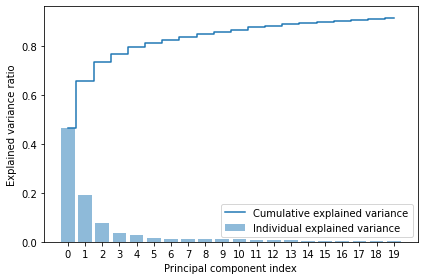

In [25]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [26]:
X.shape

(9527, 20)

In [27]:
pcaframe = pd.DataFrame()
pcaframe['subreddit'] = sublist
for i in range(10):
    pcaframe[i] = X[:,i]

In [28]:
pcaframe.head()

,subreddit,0,1,2,3,4,5,6,7,8,9
0,0x10c,-43.703270,-10.831538,-12.494239,-6.835049,-8.870333,-6.709279,-5.809178,-6.236701,-3.313519,-6.689355
1,1000ccplus,-43.714674,-10.740204,-12.758749,-6.480815,-8.891873,-6.455922,-5.238829,-6.475159,-3.326402,-6.720623
2,100movies365days,-43.746989,-10.835252,-12.357547,-6.790714,-9.013125,-6.922922,-6.431957,-6.139580,-3.264549,-6.915211
3,100yearsago,-43.749719,-10.852101,-12.799776,-6.828816,-8.919811,-6.857298,-6.320641,-6.164130,-3.312265,-6.743185
4,10mm,-43.703216,-10.656185,-12.785274,-6.689570,-8.952429,-6.685524,-5.796375,-6.248644,-3.330031,-6.702255


In [33]:
pcaframe.sort_values(by=[2]).tail(30)

,subreddit,0,1,2,3,4,5,6,7,8,9
5693,canada,123.429478,432.269365,326.877489,-143.908705,4465.671187,21.062471,42.838462,-97.112100,259.473954,-841.122074
9152,ukpolitics,19.242169,182.065708,332.016546,-74.603350,596.081802,57.175568,52.221369,261.187466,-684.861385,2386.379526
5328,australia,509.207385,1328.440014,334.743320,240.288496,21.593521,7997.730376,-3143.423210,759.761681,-44.386287,182.328944
2413,IsaacArthur,-38.202875,12.024403,372.054337,-99.595988,-28.845752,-30.551336,-28.923047,38.744015,-74.591614,244.380348
3346,POTUSWatch,1872.830525,-18.301914,389.394088,56.292336,5629.247529,-31.998764,65.747905,-142.212651,351.854794,-1179.478771
8153,progun,39.654451,239.612211,421.254939,65.932242,-70.527707,188.631781,496.094106,-119.071770,77.119628,77.569484
9178,unitedkingdom,48.697733,243.731569,444.459709,-119.467609,242.819549,14.963961,52.524908,263.779802,-469.896988,1600.481599
7297,linux,320.986008,1440.988083,482.946544,-47.903102,-107.704194,125.066269,567.818930,-2.595166,-173.126385,362.053774
8701,starcitizen,-11.217577,89.174117,508.124290,1377.735330,-34.806498,764.168095,2405.903242,-602.450627,-50.782049,87.254002
5831,climate,228.214826,951.927518,552.672985,-188.875648,1678.480898,61.353092,-33.559105,64.215481,-121.098282,286.989595


In [30]:
relevant_subs = pcaframe.sort_values(by=[2]).tail(100)['subreddit'].tolist()